In [362]:
import pandas as pd
import ssl
import numpy as np
from pathlib import Path
import sqlalchemy
#import datetime

#import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

database_connection_string = 'sqlite:///SP500.db'
engine = sqlalchemy.create_engine(database_connection_string)

In [363]:
SectorDF = pd.read_sql_table('SectorDF', engine)
SectorDF = SectorDF.drop(columns=['timestamp'])
SectorDF

,SPY,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy
0,0.003134,-0.001641,0.006510,0.000045,-0.000767,0.000146,-0.000002,0.016096,-0.004232,-0.003210,0.007684,0.001140
1,-0.003415,-0.000804,0.000509,-0.004617,-0.004491,-0.001597,-0.002539,0.007733,0.010694,0.009282,-0.004979,0.020342
2,0.005027,0.000453,0.011926,0.004855,0.003417,0.005316,-0.004535,0.011355,-0.001082,0.004324,0.011913,-0.006888
3,-0.000072,-0.003498,0.002819,-0.002692,-0.003881,0.001754,0.002421,0.002735,-0.004246,-0.001499,-0.003487,-0.018957
4,-0.002522,-0.004149,-0.000356,-0.009452,-0.002727,-0.002429,-0.007847,-0.005995,-0.003404,-0.005562,0.002253,-0.001944
...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.006956,0.005856,0.021049,0.005208,-0.009337,0.008555,0.004695,-0.003217,-0.001480,0.004416,-0.004456,0.002626
251,-0.001049,-0.005791,0.005426,-0.007141,0.001863,0.001890,0.004482,0.001318,0.002899,0.002020,0.001696,0.027976
252,-0.009435,-0.001636,-0.016449,-0.008222,-0.001345,-0.002333,0.006947,-0.014041,-0.002284,-0.001462,-0.010802,-0.018648
253,-0.010677,-0.005875,-0.009887,-0.015830,-0.014729,0.000453,-0.009666,0.006666,-0.009787,-0.003684,0.001091,-0.003254


In [364]:
# Define the target set y using the SPY column
y = SectorDF["SPY"]

# Display a sample of y
y[:5]

0    0.003134
1   -0.003415
2    0.005027
3   -0.000072
4   -0.002522
Name: SPY, dtype: float64

In [365]:
# Define features set X by selecting all columns but SPY
X = SectorDF.drop(columns=["SPY"])

# Review the features DataFrame
X.head()

,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy
0,-0.001641,0.006510,0.000045,-0.000767,0.000146,-0.000002,0.016096,-0.004232,-0.003210,0.007684,0.001140
1,-0.000804,0.000509,-0.004617,-0.004491,-0.001597,-0.002539,0.007733,0.010694,0.009282,-0.004979,0.020342
2,0.000453,0.011926,0.004855,0.003417,0.005316,-0.004535,0.011355,-0.001082,0.004324,0.011913,-0.006888
3,-0.003498,0.002819,-0.002692,-0.003881,0.001754,0.002421,0.002735,-0.004246,-0.001499,-0.003487,-0.018957
4,-0.004149,-0.000356,-0.009452,-0.002727,-0.002429,-0.007847,-0.005995,-0.003404,-0.005562,0.002253,-0.001944


In [366]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [367]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [368]:
# Define the the number of inputs (features) to the model
number_input_features = len(X.iloc[0])

# Review the number of features
number_input_features = 11

In [369]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [370]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = (number_input_features + 1) // 2 

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

6

In [371]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

3

In [372]:
# Create the Sequential model instance
nn = Sequential()

In [373]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [374]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [375]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [376]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 6)                 72        
                                                                 
 dense_80 (Dense)            (None, 3)                 21        
                                                                 
 dense_81 (Dense)            (None, 1)                 4         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [377]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [378]:
# Fit the model using 500 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
6/6 [==============================] - 0s 1ms/step - loss: 0.6229 - accuracy: 0.0052
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.0052
Epoch 3/50
6/6 [==============================] - 0s 1ms/step - loss: 0.5956 - accuracy: 0.0052
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.0052
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.0052
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.0052
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.0052
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.0052
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.0052
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.0052
Epoch 11/50
6/6 [======================

In [379]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 0.0779 - accuracy: 0.0000e+00 - 133ms/epoch - 66ms/step
Loss: 0.07788854092359543, Accuracy: 0.0


In [380]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))

<AxesSubplot:>

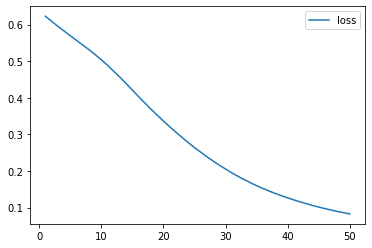

In [381]:
# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

<AxesSubplot:>

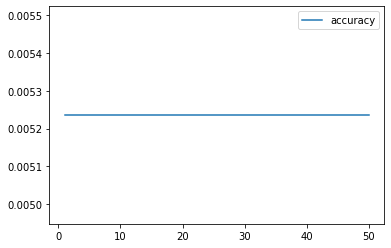

In [382]:
# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy")